In [1]:
#! pip install seaborn==0.11.2

In [2]:
drop_if_chatgpt_unavail = False # True #  if not giving chatgpt/flant5 the default (negative) response if the output is malformed

In [3]:
import numpy as np
import pickle as pickle
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [4]:
modes = ['OG',
         'CAD',
         'aCAD_GPT',
         'aCAD',
         'aCAD_FT',
         'CAD_mixed'
        ]
mode_formal = {'OG' : 'OG',
               'CAD' : 'mCAD',
               'aCAD' : 'aCAD_PJ',
               'aCAD_GPT' : 'aCAD_GPT',
               'aCAD_FT' : 'aCAD_FT',
               'CAD_mixed' : 'amCAD',
               }
mode_formal = {'OG' : 'Original ($\\bf{OG}$)',
               'CAD' : 'manual CAD ($\\bf{mCAD}$)',
               'aCAD' : 'Polyjuice CAD ($\\bf{aCAD_{PJ}}$)',
               'aCAD_GPT' : 'ChatGPT CAD ($\\bf{aCAD_{GPT}}$)',
               'aCAD_FT' : 'Flan T5 CAD ($\\bf{aCAD_{FT}}$)',
               'CAD_mixed' : 'mixed CAD ($\\bf{amCAD}$)',
               }

fs_models = [
             'chatgpt',
             'flant5'
            ]


fs_modes = {
            'chatgpt' : 'ChatGPT Few-shot ($\\bf{FS_{GPT}}$)',
            'flant5' : 'Flan T5 Few-shot ($\\bf{FS_{FT}}$)'
           }
classifiers = ['Linear SVM', 'transformer']
runs = range(0, 5)

# $\textbf{Bold Text}$

In [5]:
import seaborn as sns
import matplotlib as mpl 

sns.set_context('poster')
sns.set(style="whitegrid", font_scale=3)

In [6]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [7]:
palette = sns.color_palette('pastel').as_hex()
custom_palette = palette[:6] + ['#D8D9D9', '#A0A1A2', '#5A5A5A']
print(palette)

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


In [8]:
custom_palette

['#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff',
 '#debb9b',
 '#D8D9D9',
 '#A0A1A2',
 '#5A5A5A']

In [9]:
neg_labels = {'sexism' : 'non-sexist', 'hatespeech' : 'not hate'}
pos_labels = {'sexism' : 'sexist', 'hatespeech' : 'hate'}

In [10]:
classifier_to_get = 'transformer' # 'Linear SVM' #  

In [11]:
test_set_data = {}
constructs = ['sexism', 'hatespeech']

test_set_data['sexism'] = pd.read_csv('../results/intermediate/sexism_results.csv', sep = '\t')
test_set_data['hatespeech'] = pd.read_csv('../results/intermediate/hatespeech_results.csv',  sep = '\t')

test_set_data['sexism'] = pd.read_csv('../results/intermediate/sexism_results (3).csv', sep = '\t')
test_set_data['hatespeech'] = pd.read_csv('../results/intermediate/hatespeech_results (3).csv',  sep = '\t')

In [12]:
test_set_data['sexism'][['OG_transformer_0_predictions', 'OG_transformer_1_predictions', 'OG_transformer_2_predictions']].tail(30)

,OG_transformer_0_predictions,OG_transformer_1_predictions,OG_transformer_2_predictions
31694,non-sexist,non-sexist,non-sexist
31695,non-sexist,non-sexist,non-sexist
31696,non-sexist,non-sexist,non-sexist
31697,sexist,sexist,sexist
31698,non-sexist,sexist,sexist
31699,non-sexist,sexist,non-sexist
31700,non-sexist,non-sexist,non-sexist
31701,non-sexist,non-sexist,non-sexist
31702,non-sexist,non-sexist,non-sexist
31703,sexist,sexist,sexist


In [13]:
test_set_data['sexism'].columns

Index(['_id', 'chatgpt_labels', 'text', 'sexism',
       'OG_Linear SVM_0_predictions', 'OG_Linear SVM_0_probabilities',
       'OG_Linear SVM_1_predictions', 'OG_Linear SVM_1_probabilities',
       'OG_Linear SVM_2_predictions', 'OG_Linear SVM_2_probabilities',
       ...
       'CAD_mixed_transformer_0_probabilities',
       'CAD_mixed_transformer_1_predictions',
       'CAD_mixed_transformer_1_probabilities',
       'CAD_mixed_transformer_2_predictions',
       'CAD_mixed_transformer_2_probabilities',
       'CAD_mixed_transformer_3_predictions',
       'CAD_mixed_transformer_3_probabilities',
       'CAD_mixed_transformer_4_predictions',
       'CAD_mixed_transformer_4_probabilities', 'dataset'],
      dtype='object', length=125)

In [14]:
test_set_data['hatespeech'].columns

Index(['_id', 'chatgpt_labels', 'text', 'hatespeech',
       'OG_Linear SVM_0_predictions', 'OG_Linear SVM_0_probabilities',
       'OG_Linear SVM_1_predictions', 'OG_Linear SVM_1_probabilities',
       'OG_Linear SVM_2_predictions', 'OG_Linear SVM_2_probabilities',
       ...
       'CAD_mixed_transformer_0_probabilities',
       'CAD_mixed_transformer_1_predictions',
       'CAD_mixed_transformer_1_probabilities',
       'CAD_mixed_transformer_2_predictions',
       'CAD_mixed_transformer_2_probabilities',
       'CAD_mixed_transformer_3_predictions',
       'CAD_mixed_transformer_3_probabilities',
       'CAD_mixed_transformer_4_predictions',
       'CAD_mixed_transformer_4_probabilities', 'dataset'],
      dtype='object', length=125)

In [15]:
for construct in constructs:
    print(test_set_data[construct].groupby(['dataset', construct]).size())
    print()

dataset          sexism    
hatecheck        non-sexist      136
                 sexist          373
in_domain        non-sexist      690
                 sexist          534
out_of_domain    non-sexist     1800
                 sexist         1636
out_of_domain_2  non-sexist     5856
                 sexist          699
out_of_domain_3  non-sexist    15146
                 sexist         4854
dtype: int64

dataset          hatespeech
hatecheck        hate           2563
                 not hate       1165
in_domain        hate            471
                 not hate        464
out_of_domain    hate          14614
                 not hate      19162
out_of_domain_2  hate           1260
                 not hate       1740
out_of_domain_3  hate           5256
                 not hate      17067
out_of_domain_4  hate           1267
                 not hate       5738
dtype: int64



In [16]:
test_set_data['sexism']#['out_of_domain']

,_id,chatgpt_labels,text,sexism,OG_Linear SVM_0_predictions,OG_Linear SVM_0_probabilities,OG_Linear SVM_1_predictions,OG_Linear SVM_1_probabilities,OG_Linear SVM_2_predictions,OG_Linear SVM_2_probabilities,...,CAD_mixed_transformer_0_probabilities,CAD_mixed_transformer_1_predictions,CAD_mixed_transformer_1_probabilities,CAD_mixed_transformer_2_predictions,CAD_mixed_transformer_2_probabilities,CAD_mixed_transformer_3_predictions,CAD_mixed_transformer_3_probabilities,CAD_mixed_transformer_4_predictions,CAD_mixed_transformer_4_probabilities,dataset
0,5d654919ce2c6bd733477d59,"['Sexist.', 'Sexist.', 'Sexist.']",Maybe the girls should have less tickets on th...,sexist,sexist,0.398141,sexist,0.494026,sexist,0.408849,...,0.300155,sexist,0.113481,sexist,0.178025,sexist,0.258981,sexist,0.272025,in_domain
1,5d654904ce2c6bd733475d0c,['Sexist. The sentence reinforces gender stere...,ABCDEFG means A Boy Can Do Everything For a ...,non-sexist,sexist,0.489555,non-sexist,0.543701,non-sexist,0.578026,...,0.132122,sexist,0.165323,sexist,0.154058,sexist,0.126731,sexist,0.282790,in_domain
2,5d654914ce2c6bd7334772b3,"['Non-sexist.', 'Non-sexist.', 'non-sexist']","Today in ""things GamerGate does to try to stop...",non-sexist,non-sexist,0.797014,non-sexist,0.817142,non-sexist,0.812972,...,0.981666,non-sexist,0.978590,non-sexist,0.979687,non-sexist,0.978753,non-sexist,0.975131,in_domain
3,5d654901ce2c6bd733475c0e,"['Sexist.', 'Sexist.', 'Sexist.']",Nothing like a man willing to spoil you. 😌 how...,non-sexist,non-sexist,0.594003,sexist,0.495233,non-sexist,0.611880,...,0.403156,sexist,0.448336,sexist,0.431936,sexist,0.323006,sexist,0.434956,in_domain
4,5ddc4fe8174b03a4c6aaf74b,"['non-sexist', 'Non-sexist.', 'non-sexist']",Having a job means having a life of your own,non-sexist,sexist,0.335536,sexist,0.420712,sexist,0.263946,...,0.877161,non-sexist,0.850407,non-sexist,0.883085,non-sexist,0.934515,non-sexist,0.857709,in_domain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31719,3870,"['Sexist.', 'Sexist.', 'Sexist.']",Too many b1tches in this country.,sexist,non-sexist,0.778769,non-sexist,0.697601,non-sexist,0.700329,...,0.941439,non-sexist,0.930205,non-sexist,0.958538,non-sexist,0.972072,non-sexist,0.959116,hatecheck
31720,3871,"['Sexist.', 'Sexist.', 'Sexist.']",Too many slu7s in this country.,sexist,non-sexist,0.533959,sexist,0.438890,sexist,0.435102,...,0.951504,non-sexist,0.929887,non-sexist,0.976847,non-sexist,0.976891,non-sexist,0.968915,hatecheck
31721,3872,"['Sexist.', 'Sexist.', 'Sexist.']",Too many wh0res in this country.,sexist,non-sexist,0.578574,sexist,0.428502,sexist,0.444073,...,0.943815,non-sexist,0.836955,non-sexist,0.936460,non-sexist,0.953966,non-sexist,0.902610,hatecheck
31722,3888,"['Sexist.', 'Sexist.', 'sexist']",Female lives aren't worth sh1t.,sexist,non-sexist,0.817796,non-sexist,0.804877,non-sexist,0.802446,...,0.160003,sexist,0.113924,sexist,0.177098,sexist,0.124959,sexist,0.137301,hatecheck


In [17]:
test_set_data[construct]['dataset'].unique()

array(['in_domain', 'out_of_domain', 'out_of_domain_2', 'out_of_domain_3',
       'out_of_domain_4', 'hatecheck'], dtype=object)

In [18]:
test_set_data['sexism'].groupby(['sexism', 'dataset']).size().unstack()

dataset,hatecheck,in_domain,out_of_domain,out_of_domain_2,out_of_domain_3
sexism,,,,,
non-sexist,136,690,1800,5856,15146
sexist,373,534,1636,699,4854


In [19]:
test_set_data['hatespeech'].groupby(['hatespeech', 'dataset']).size().unstack()

dataset,hatecheck,in_domain,out_of_domain,out_of_domain_2,out_of_domain_3,out_of_domain_4
hatespeech,,,,,,
hate,2563,471,14614,1260,5256,1267
not hate,1165,464,19162,1740,17067,5738


### add the perspective labels

In [20]:
perspective = {}

for construct in constructs:
    perspective_data = []
    folderpath = '../data/data/data/%s/test' %construct
    onlyfiles = ['in_domain', 'out_of_domain', 'out_of_domain_2', 'out_of_domain_3', 'hatecheck']
    if construct == 'hatespeech':
        onlyfiles.append('out_of_domain_4')
    for filename in onlyfiles:
        data = pd.read_csv(folderpath + '/' + filename + '_perspective.csv')
        data['dataset'] = [filename] * len(data)
        perspective_data.append(data)
    perspective[construct] = pd.concat(perspective_data)

In [21]:
perspective['sexism']

,_id,text,sexism,THREAT,ATTACK_ON_COMMENTER,INCOHERENT,PROFANITY,ATTACK_ON_AUTHOR,UNSUBSTANTIAL,INSULT,SEXUALLY_EXPLICIT,FLIRTATION,TOXICITY,INFLAMMATORY,SPAM,LIKELY_TO_REJECT,OBSCENE,SEVERE_TOXICITY,IDENTITY_ATTACK,dataset
0,5d654919ce2c6bd733477d59,Maybe the girls should have less tickets on th...,sexist,0.009515,0.051922,0.770831,0.020852,0.037697,0.761200,0.027218,0.020406,0.323476,0.108267,0.470876,0.258834,0.608501,0.478113,0.002728,0.049253,in_domain
1,5d654904ce2c6bd733475d0c,ABCDEFG means A Boy Can Do Everything For a ...,non-sexist,0.011819,0.038526,0.834661,0.078702,0.230245,0.406685,0.037395,0.172904,0.571120,0.171118,0.109628,0.148747,0.166367,0.315454,0.008163,0.065678,in_domain
2,5d654914ce2c6bd7334772b3,"Today in ""things GamerGate does to try to stop...",non-sexist,0.008557,0.022005,0.494409,0.015626,0.165790,0.346475,0.010439,0.008965,0.201013,0.026735,0.042498,0.395146,0.328057,0.211496,0.001154,0.005143,in_domain
3,5d654901ce2c6bd733475c0e,Nothing like a man willing to spoil you. 😌 how...,non-sexist,0.036840,0.615970,0.890323,0.121588,0.411841,0.690385,0.030265,0.201136,0.334997,0.201260,0.340355,0.698735,0.779028,0.728027,0.007820,0.006734,in_domain
4,5ddc4fe8174b03a4c6aaf74b,Having a job means having a life of your own,non-sexist,0.007845,0.930754,0.599596,0.017709,0.326698,0.800489,0.014353,0.010321,0.243205,0.045131,0.200683,0.083527,0.822768,0.017187,0.001602,0.005698,in_domain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,3870,Too many b1tches in this country.,sexist,0.012389,0.338250,0.822876,0.718133,0.080156,0.830752,0.715512,0.197574,0.331742,0.833343,0.471078,0.100193,0.809737,0.656501,0.233409,0.404479,hatecheck
505,3871,Too many slu7s in this country.,sexist,0.009204,0.332359,0.834661,0.256413,0.071190,0.832063,0.402434,0.063060,0.292909,0.397472,0.384534,0.103007,0.786649,0.543402,0.019353,0.240745,hatecheck
506,3872,Too many wh0res in this country.,sexist,0.010447,0.284638,0.834661,0.473824,0.064230,0.830752,0.545257,0.184969,0.365597,0.571686,0.472718,0.102926,0.808266,0.585443,0.122829,0.343248,hatecheck
507,3888,Female lives aren't worth sh1t.,sexist,0.013580,0.089545,0.313049,0.659612,0.227444,0.392762,0.513094,0.198761,0.270014,0.718943,0.568032,0.013371,0.981301,0.989232,0.225137,0.600718,hatecheck


In [22]:
perspective['hatespeech']

,_id,text,hatespeech,UNSUBSTANTIAL,ATTACK_ON_COMMENTER,SPAM,INFLAMMATORY,LIKELY_TO_REJECT,INCOHERENT,THREAT,INSULT,ATTACK_ON_AUTHOR,FLIRTATION,OBSCENE,SEVERE_TOXICITY,SEXUALLY_EXPLICIT,IDENTITY_ATTACK,PROFANITY,TOXICITY,dataset
0,19625,Immigrants are usually unpleasant,hate,0.864917,0.315838,0.022959,0.634595,0.894473,0.467895,0.009644,0.367985,0.168349,0.216909,0.046369,0.023077,0.025714,0.550447,0.185409,0.478864,in_domain
1,19662,Disabled people are sycophantic,hate,0.920660,0.600452,0.027534,0.439919,0.839928,0.541845,0.011431,0.448025,0.400975,0.278995,0.052261,0.043077,0.043273,0.550447,0.264637,0.509388,in_domain
2,19668,There are loads of black people on my street,not hate,0.808975,0.183316,0.061541,0.749053,0.836468,0.731586,0.024235,0.246302,0.051013,0.234318,0.077808,0.023077,0.028899,0.489156,0.201395,0.396442,in_domain
3,19680,There are many black women on my street,not hate,0.830752,0.096928,0.079546,0.568032,0.716813,0.697387,0.012182,0.168611,0.035443,0.489299,0.043092,0.016836,0.041683,0.408831,0.170086,0.338998,in_domain
4,19688,There are many chinese people living on this s...,not hate,0.831426,0.094836,0.081823,0.465359,0.554439,0.890323,0.009696,0.031697,0.018317,0.184854,0.016321,0.004807,0.013683,0.176146,0.043917,0.162453,in_domain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,7000,Each of the divorce must be pronounced with a ...,not hate,0.730814,0.556098,0.440519,0.438204,0.710525,0.890323,0.007936,0.008577,0.207815,0.320270,0.404193,0.001316,0.006075,0.005624,0.012790,0.018472,out_of_domain_4
7001,7001,He is 62-yr-old Harswaroop Chauhan. His only s...,not hate,0.397962,0.382364,0.480368,0.758963,0.766772,0.918206,0.013269,0.017485,0.087978,0.462923,0.285574,0.002651,0.007520,0.007622,0.015318,0.042657,out_of_domain_4
7002,7002,"Peace of graveyard or peace of mind, @asadowai...",not hate,0.798858,0.303788,0.415793,0.179777,0.766772,0.834661,0.010499,0.088316,0.065035,0.250964,0.198378,0.005493,0.019580,0.015355,0.031141,0.108701,out_of_domain_4
7003,7003,The humble #tribute on the sacrifice day of #J...,not hate,0.519171,0.049661,0.646001,0.265516,0.666712,0.973799,0.008661,0.011617,0.020568,0.457595,0.585443,0.002146,0.011913,0.007437,0.018392,0.018346,out_of_domain_4


#### getting perspective labels

In [23]:
for construct in constructs:
    perspective[construct]['toxicity_label'] = [pos_labels[construct] if i >= 0.7 else neg_labels[construct]\
                                     for i in perspective[construct]['TOXICITY']]

In [24]:
test_set_data['sexism'].groupby(['dataset', 'sexism']).size().unstack()

sexism,non-sexist,sexist
dataset,,
hatecheck,136,373
in_domain,690,534
out_of_domain,1800,1636
out_of_domain_2,5856,699
out_of_domain_3,15146,4854


In [25]:
perspective['sexism'].groupby(['dataset', 'sexism']).size().unstack()

sexism,non-sexist,sexist
dataset,,
hatecheck,136,373
in_domain,690,534
out_of_domain,1800,1636
out_of_domain_2,5856,699
out_of_domain_3,15146,4854


In [26]:
test_set_data['hatespeech'].groupby(['dataset', 'hatespeech']).size().unstack()

hatespeech,hate,not hate
dataset,,
hatecheck,2563,1165
in_domain,471,464
out_of_domain,14614,19162
out_of_domain_2,1260,1740
out_of_domain_3,5256,17067
out_of_domain_4,1267,5738


In [27]:
perspective['hatespeech'].groupby(['dataset', 'hatespeech']).size().unstack()

hatespeech,hate,not hate
dataset,,
hatecheck,2563,1165
in_domain,471,464
out_of_domain,14614,19162
out_of_domain_2,1260,1740
out_of_domain_3,5256,17067
out_of_domain_4,1267,5738


In [28]:
perspective['sexism'].isna().sum()

_id                    0
text                   0
sexism                 0
THREAT                 0
ATTACK_ON_COMMENTER    0
INCOHERENT             0
PROFANITY              0
ATTACK_ON_AUTHOR       0
UNSUBSTANTIAL          0
INSULT                 0
SEXUALLY_EXPLICIT      0
FLIRTATION             0
TOXICITY               0
INFLAMMATORY           0
SPAM                   0
LIKELY_TO_REJECT       0
OBSCENE                0
SEVERE_TOXICITY        0
IDENTITY_ATTACK        0
dataset                0
toxicity_label         0
dtype: int64

In [29]:
perspective['hatespeech']#.isna().sum()

,_id,text,hatespeech,UNSUBSTANTIAL,ATTACK_ON_COMMENTER,SPAM,INFLAMMATORY,LIKELY_TO_REJECT,INCOHERENT,THREAT,...,ATTACK_ON_AUTHOR,FLIRTATION,OBSCENE,SEVERE_TOXICITY,SEXUALLY_EXPLICIT,IDENTITY_ATTACK,PROFANITY,TOXICITY,dataset,toxicity_label
0,19625,Immigrants are usually unpleasant,hate,0.864917,0.315838,0.022959,0.634595,0.894473,0.467895,0.009644,...,0.168349,0.216909,0.046369,0.023077,0.025714,0.550447,0.185409,0.478864,in_domain,not hate
1,19662,Disabled people are sycophantic,hate,0.920660,0.600452,0.027534,0.439919,0.839928,0.541845,0.011431,...,0.400975,0.278995,0.052261,0.043077,0.043273,0.550447,0.264637,0.509388,in_domain,not hate
2,19668,There are loads of black people on my street,not hate,0.808975,0.183316,0.061541,0.749053,0.836468,0.731586,0.024235,...,0.051013,0.234318,0.077808,0.023077,0.028899,0.489156,0.201395,0.396442,in_domain,not hate
3,19680,There are many black women on my street,not hate,0.830752,0.096928,0.079546,0.568032,0.716813,0.697387,0.012182,...,0.035443,0.489299,0.043092,0.016836,0.041683,0.408831,0.170086,0.338998,in_domain,not hate
4,19688,There are many chinese people living on this s...,not hate,0.831426,0.094836,0.081823,0.465359,0.554439,0.890323,0.009696,...,0.018317,0.184854,0.016321,0.004807,0.013683,0.176146,0.043917,0.162453,in_domain,not hate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,7000,Each of the divorce must be pronounced with a ...,not hate,0.730814,0.556098,0.440519,0.438204,0.710525,0.890323,0.007936,...,0.207815,0.320270,0.404193,0.001316,0.006075,0.005624,0.012790,0.018472,out_of_domain_4,not hate
7001,7001,He is 62-yr-old Harswaroop Chauhan. His only s...,not hate,0.397962,0.382364,0.480368,0.758963,0.766772,0.918206,0.013269,...,0.087978,0.462923,0.285574,0.002651,0.007520,0.007622,0.015318,0.042657,out_of_domain_4,not hate
7002,7002,"Peace of graveyard or peace of mind, @asadowai...",not hate,0.798858,0.303788,0.415793,0.179777,0.766772,0.834661,0.010499,...,0.065035,0.250964,0.198378,0.005493,0.019580,0.015355,0.031141,0.108701,out_of_domain_4,not hate
7003,7003,The humble #tribute on the sacrifice day of #J...,not hate,0.519171,0.049661,0.646001,0.265516,0.666712,0.973799,0.008661,...,0.020568,0.457595,0.585443,0.002146,0.011913,0.007437,0.018392,0.018346,out_of_domain_4,not hate


In [30]:
for construct in constructs:
    print(len(test_set_data[construct]))
    test_set_data[construct]['_id'] = [str(row['_id']) + '_' + row['dataset'] for _, row in test_set_data[construct].iterrows()]
    perspective[construct]['_id'] = [str(row['_id']) + '_' + row['dataset'] for _, row in perspective[construct].iterrows()]
    
    
    test_set_data[construct] = test_set_data[construct].merge(perspective[construct][['_id', 'toxicity_label']], how = 'left')
    print(len(test_set_data[construct]))

31724
31724
70767
70767


### add the Flan T5 metrics

In [31]:
flant5 = {}
for construct in constructs:
    flant5[construct] = pd.read_csv('../results/intermediate/%s_flant5_labels.csv' %construct, sep = '\t')

In [32]:
for construct in constructs:
    print(len(test_set_data[construct]))
    test_set_data[construct] = test_set_data[construct].merge(flant5[construct][['_id', 'flant5_labels']], how = 'left')
    print(len(test_set_data[construct]))

31724
31724
70767
70767


## get the metrics

In [33]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, roc_curve, roc_auc_score, f1_score, accuracy_score, recall_score
from sklearn import metrics

In [34]:
all_results = []

for construct in constructs:
    for mode in modes:
        for classifier in classifiers:
            for run in runs:
                for test_set in test_set_data[construct]['dataset'].unique():
                    result = {}
                    result['test_set'] = test_set
                    result['run'] = run
                    result['classifier'] = classifier
                    result['mode'] = mode_formal[mode]
                    result['construct'] = construct
                
                    data_subset = test_set_data[construct][test_set_data[construct]['dataset'] == test_set]
                
                    trues = data_subset[construct].values
                    preds = data_subset['%s_%s_%d_predictions' %(mode, classifier, run)].values
                    probabilities = data_subset['%s_%s_%d_probabilities' %(mode, classifier, run)].values
        
                    scores = precision_recall_fscore_support(trues, preds)
            
                    result['predictions'] = preds
                    result['pos_precision'] = scores[0][0]
                    result['neg_precision'] = scores[0][1]
                    result['pos_recall'] = scores[1][0]
                    result['neg_recall'] = scores[1][0]
                    result['pos_f1'] = scores[2][0]
                    result['neg_f1'] = scores[2][1]
                    result['macro_f1'] = f1_score(trues, preds, average = 'macro')
                    result['micro_f1'] = f1_score(trues, preds, average = 'micro')
                    result['weighted_f1'] = f1_score(trues, preds, average = 'weighted')
                    
                    fpr, tpr, thresholds = metrics.roc_curve(trues, probabilities, pos_label=pos_labels[construct])
                    result['auc'] = metrics.auc(fpr, tpr)
                    result['auc'] = roc_auc_score(trues, probabilities)
        
                    ## ref: https://stackoverflow.com/questions/56203875/how-to-compute-false-positive-rate-fpr-and-false-negative-rate-percantage
                    tpr = recall_score(trues, preds, pos_label=pos_labels[construct])
                    tnr = recall_score(trues, preds, pos_label=neg_labels[construct]) 
                    fpr = 1 - tnr
                    fnr = 1 - tpr
        
                    result['fpr'] = fpr
                    result['fpr-fnr'] = fpr - fnr
        
                    all_results.append(result.copy())

C:\Users\isen1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\isen1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\isen1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\isen1\anaconda3\Lib\site-packages\sklearn\metr

In [35]:
all_results

[{'test_set': 'in_domain',
  'run': 0,
  'classifier': 'Linear SVM',
  'mode': 'Original ($\\bf{OG}$)',
  'construct': 'sexism',
  'predictions': array(['sexist', 'sexist', 'non-sexist', ..., 'non-sexist', 'non-sexist',
         'non-sexist'], dtype=object),
  'pos_precision': 0.8206349206349206,
  'neg_precision': 0.7087542087542088,
  'pos_recall': 0.7492753623188406,
  'neg_recall': 0.7492753623188406,
  'pos_f1': 0.7833333333333333,
  'neg_f1': 0.7464539007092199,
  'macro_f1': 0.7648936170212766,
  'micro_f1': 0.7663398692810458,
  'weighted_f1': 0.7672437769434015,
  'auc': 0.14921836834391794,
  'fpr': 0.2507246376811594,
  'fpr-fnr': 0.03911415078977365},
 {'test_set': 'out_of_domain',
  'run': 0,
  'classifier': 'Linear SVM',
  'mode': 'Original ($\\bf{OG}$)',
  'construct': 'sexism',
  'predictions': array(['non-sexist', 'non-sexist', 'non-sexist', ..., 'non-sexist',
         'sexist', 'non-sexist'], dtype=object),
  'pos_precision': 0.5702075702075702,
  'neg_precision': 0.5

In [36]:
import ast
import string

### Aggregate the ChatGPT and optionally Flan T5 labels 

In [37]:
for construct in ['sexism']:
    for run in range(0, 3):
        for fs in fs_models:
            labels = []
            for test_set in test_set_data[construct]['dataset'].unique():
                data_subset = test_set_data[construct][test_set_data[construct]['dataset'] == test_set]
                for _, row in data_subset.iterrows():
                    label = ast.literal_eval(row['%s_labels' %fs])[run].lower().translate(str.maketrans('',
                                                                                                     '', string.punctuation))
                    label = label.split(' ')[0]
                    if label == 'nonsexist':
                        label = 'non-sexist'
                    elif label == 'sexis' or label == 'benevolent':
                        label = 'sexist'
                
                    if label != 'sexist' and label != 'non-sexist': # because non-sexist is the default reponse
                        if drop_if_chatgpt_unavail:
                            label = 'unavail'
                        else:
                            label = 'non-sexist'
                    # count_no_label += 1
                    labels.append(label)
            test_set_data[construct]['%s_label_%d' %(fs, run)] = labels
#             test_set_data[construct] = test_set_data[construct][test_set_data[construct]['%s_label_%d' %(fs, run)] != \
#                                                                     'unavail']

In [38]:
for construct in ['hatespeech']:
    for run in range(0, 3):
        for fs in fs_models:
            labels = []
            for test_set in test_set_data[construct]['dataset'].unique():
                data_subset = test_set_data[construct][test_set_data[construct]['dataset'] == test_set]
                for _, row in data_subset.iterrows():
                    if type(row['%s_labels' %fs]) == str:
                        label = ast.literal_eval(row['%s_labels' %fs])[run].lower().translate(str.maketrans('',
                                                                                            '', string.punctuation))
                    else:
                        label = ''
                    
                    label = label.split(' ')[0]
                    if label == 'not':
                        label = 'not hate'
        
                    if label != 'hate' and label != 'not hate': # because not hate is the default reponse
                        if drop_if_chatgpt_unavail:
                            label = 'unavail'
                        else:
                            label = 'not hate'
                        # count_no_label += 1
                    labels.append(label)
            test_set_data[construct]['%s_label_%d' %(fs, run)] = labels
#             test_set_data[construct] = test_set_data[construct][test_set_data[construct]['%s_label_%d' %(fs, run)] != \
#                                                                 'unavail']

In [39]:
for construct in constructs:
    for test_set in test_set_data[construct]['dataset'].unique():
        for fs_model in fs_models:
            for run in range(0, 3):
                result = {}
                result['test_set'] = test_set
                result['mode'] = fs_modes[fs_model] #'$FS_{GPT}$'
                result['construct'] = construct
                result['classifier'] = classifier_to_get
                result['run'] = run
                
                data_subset = test_set_data[construct][test_set_data[construct]['dataset'] == test_set]
                
                trues = data_subset[construct].values
                # preds = data_subset['chatgpt_label_aggregate'].values
                preds = data_subset['%s_label_%d' %(fs_model, run)].values
        
                scores = precision_recall_fscore_support(trues, preds)
            
                result['predictions'] = preds
                result['pos_precision'] = scores[0][0]
                result['neg_precision'] = scores[0][1]
                result['pos_recall'] = scores[1][0]
                result['neg_recall'] = scores[1][0]
                result['pos_f1'] = scores[2][0]
                result['neg_f1'] = scores[2][1]
                result['macro_f1'] = f1_score(trues, preds, average = 'macro')
                result['micro_f1'] = f1_score(trues, preds, average = 'micro')
                result['weighted_f1'] = f1_score(trues, preds, average = 'weighted')
            
                actual_negs = data_subset[data_subset[construct] == neg_labels[construct]]
                fps = len(actual_negs[actual_negs['%s_label_%d' %(fs_model, run)] == pos_labels[construct]])
            
                result['fpr'] = fps/len(actual_negs)
            
                actual_poss = data_subset[data_subset[construct] == pos_labels[construct]]
                fns = len(actual_poss[actual_poss['%s_label_%d' %(fs_model, run)] == neg_labels[construct]])
            
                result['fnr'] = fns/len(actual_poss)
            
                result['fpr-fnr'] = result['fpr'] - result['fnr']
        
                all_results.append(result.copy())

In [40]:
test_set_data['hatespeech']

,_id,chatgpt_labels,text,hatespeech,OG_Linear SVM_0_predictions,OG_Linear SVM_0_probabilities,OG_Linear SVM_1_predictions,OG_Linear SVM_1_probabilities,OG_Linear SVM_2_predictions,OG_Linear SVM_2_probabilities,...,CAD_mixed_transformer_4_probabilities,dataset,toxicity_label,flant5_labels,chatgpt_label_0,flant5_label_0,chatgpt_label_1,flant5_label_1,chatgpt_label_2,flant5_label_2
0,19625_in_domain,"['2) not hate', 'hate', 'hate']",Immigrants are usually unpleasant,hate,hate,0.898420,hate,0.888437,hate,0.880566,...,0.733834,in_domain,not hate,"['hate', 'hate', 'hate']",not hate,hate,hate,hate,hate,hate
1,19662_in_domain,"['hate', 'Hate. This sentence contains hate sp...",Disabled people are sycophantic,hate,not hate,0.094961,not hate,0.082127,not hate,0.091994,...,0.295738,in_domain,not hate,"['not hate', 'not hate', 'not hate']",hate,not hate,hate,not hate,hate,not hate
2,19668_in_domain,"['Not hate.', 'Not hate.', 'Not Hate.']",There are loads of black people on my street,not hate,not hate,0.023318,not hate,0.027390,not hate,0.029185,...,0.691289,in_domain,not hate,"['not hate', 'not hate', 'not hate']",not hate,not hate,not hate,not hate,not hate,not hate
3,19680_in_domain,"['Not hate.', 'Not hate.', 'Not hate.']",There are many black women on my street,not hate,not hate,0.055650,not hate,0.049341,not hate,0.052430,...,0.819821,in_domain,not hate,"['not hate', 'not hate', 'not hate']",not hate,not hate,not hate,not hate,not hate,not hate
4,19688_in_domain,"['Not hate.', 'Not hate.', 'Not hate.']",There are many chinese people living on this s...,not hate,not hate,0.019961,not hate,0.017258,not hate,0.020796,...,0.812867,in_domain,not hate,"['not hate', 'not hate', 'not hate']",not hate,not hate,not hate,not hate,not hate,not hate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70762,3897_hatecheck,['Hate. This post dehumanizes and insults gay ...,Gay people are all complete 4ssholes.,hate,hate,0.791028,hate,0.778179,hate,0.797944,...,0.127002,hatecheck,hate,"['1) hate', '1) hate', '1) hate']",hate,not hate,hate,not hate,hate,not hate
70763,3898_hatecheck,"['Hate.', 'Hate. This sentence dehumanizes and...",Black people are all complete 4ssholes.,hate,hate,0.832536,hate,0.846239,hate,0.847765,...,0.156685,hatecheck,hate,"['1) hate', '1) hate', '1) hate']",hate,not hate,hate,not hate,hate,not hate
70764,3899_hatecheck,"['Hate.', 'hate', 'hate']",Disabled people are all complete 4ssholes.,hate,hate,0.572219,hate,0.609739,hate,0.570964,...,0.128854,hatecheck,hate,"['hate', 'hate', 'hate']",hate,hate,hate,hate,hate,hate
70765,3900_hatecheck,['Hate. This sentence degrades and insults an ...,Muslims are all complete 4ssholes.,hate,hate,0.975383,hate,0.978852,hate,0.976664,...,0.147863,hatecheck,hate,"['1) hate', '1) hate', '1) hate']",hate,not hate,hate,not hate,hate,not hate


In [41]:

for construct in constructs:
    for test_set in test_set_data[construct]['dataset'].unique():
        result = {}
        result['test_set'] = test_set
        result['mode'] = 'Perspective ($\\bf{P_{tox}}$)'
        result['construct'] = construct
        result['classifier'] = classifier_to_get
        result['run'] = run
                
        data_subset = test_set_data[construct][test_set_data[construct]['dataset'] == test_set]
                
        trues = data_subset[construct].values
        preds = data_subset['toxicity_label'].values
        
        scores = precision_recall_fscore_support(trues, preds)
            
        result['predictions'] = preds
        result['pos_precision'] = scores[0][0]
        result['neg_precision'] = scores[0][1]
        result['pos_recall'] = scores[1][0]
        result['neg_recall'] = scores[1][0]
        result['pos_f1'] = scores[2][0]
        result['neg_f1'] = scores[2][1]
        result['macro_f1'] = f1_score(trues, preds, average = 'macro')
        result['micro_f1'] = f1_score(trues, preds, average = 'micro')
        result['weighted_f1'] = f1_score(trues, preds, average = 'weighted')
            
        actual_negs = data_subset[data_subset[construct] == neg_labels[construct]]
        fps = len(actual_negs[actual_negs['toxicity_label'] == pos_labels[construct]])
            
        result['fpr'] = fps/len(actual_negs)
            
        actual_poss = data_subset[data_subset[construct] == pos_labels[construct]]
        fns = len(actual_poss[actual_poss['toxicity_label'] == neg_labels[construct]])
            
        result['fnr'] = fns/len(actual_poss)
            
        result['fpr-fnr'] = result['fpr'] - result['fnr']
        
        all_results.append(result.copy())


In [42]:
result

{'test_set': 'hatecheck',
 'mode': 'Perspective ($\\bf{P_{tox}}$)',
 'construct': 'hatespeech',
 'classifier': 'transformer',
 'run': 2,
 'predictions': array(['hate', 'hate', 'hate', ..., 'hate', 'hate', 'hate'], dtype=object),
 'pos_precision': 0.8851063829787233,
 'neg_precision': 0.4685549687950072,
 'pos_recall': 0.5680842762387827,
 'neg_recall': 0.5680842762387827,
 'pos_f1': 0.6920152091254753,
 'neg_f1': 0.6009852216748769,
 'macro_f1': 0.6465002154001761,
 'micro_f1': 0.6523605150214592,
 'weighted_f1': 0.6635683380471633,
 'fpr': 0.16223175965665235,
 'fnr': 0.43191572376121734,
 'fpr-fnr': -0.26968396410456497}

In [43]:
all_results_df = pd.DataFrame(all_results)
all_results_df_hs = all_results_df[all_results_df['construct'] == 'hatespeech']

In [44]:
all_results_df_hs_ = all_results_df_hs[['mode', 'test_set', 'classifier', 'macro_f1',
                                                                               'micro_f1']]

In [45]:
data = all_results_df_hs_.groupby(['mode', 'test_set', 'classifier']).mean()[[                   'macro_f1',
                                                                               'micro_f1']].unstack().round(3).fillna(0)

std = all_results_df_hs_.groupby(['mode', 'test_set', 'classifier']).std()[[                   'macro_f1',
                                                                             'micro_f1']].unstack().round(3).fillna(0)

In [46]:
for col in std.columns:
    std[col] = ' ± ' + std[col].astype(str)

In [47]:
data = data.astype(str) + std.astype(str)
data

macro_f1  \
classifier                                             Linear SVM   
mode                               test_set                         
ChatGPT CAD ($\bf{aCAD_{GPT}}$)    hatecheck        0.604 ± 0.009   
                                   in_domain        0.714 ± 0.008   
                                   out_of_domain    0.509 ± 0.011   
                                   out_of_domain_2  0.482 ± 0.012   
                                   out_of_domain_3  0.438 ± 0.009   
                                   out_of_domain_4  0.397 ± 0.015   
ChatGPT Few-shot ($\bf{FS_{GPT}}$) hatecheck            0.0 ± 0.0   
                                   in_domain            0.0 ± 0.0   
                                   out_of_domain        0.0 ± 0.0   
                                   out_of_domain_2      0.0 ± 0.0   
                                   out_of_domain_3      0.0 ± 0.0   
                                   out_of_domain_4      0.0 ± 0.0   
Flan T5 CAD ($\bf{aCAD_{FT}}$)     hatecheck        0.384 ± 0.009   
                                   in_domain        0.675 ± 0.013   
                                   out_of_domain    0.449 ± 0.016   
                                   out_of_domain_2  0.444 ± 0.009   
                                   out_of_domain_3  0.415 ± 0.017   
                                   out_of_domain_4  0.405 ± 0.025   
Flan T5 Few-shot ($\bf{FS_{FT}}$)  hatecheck            0.0 ± 0.0   
                                   in_domain            0.0 ± 0.0   
                                   out_of_domain        0.0 ± 0.0   
                                   out_of_domain_2      0.0 ± 0.0   
                                   out_of_domain_3      0.0 ± 0.0   
                                   out_of_domain_4      0.0 ± 0.0   
Original ($\bf{OG}$)               hatecheck        0.588 ± 0.003   
                                   in_domain        0.881 ± 0.002   
                                   out_of_domain    0.424 ± 0.003   
                                   out_of_domain_2   0.46 ± 0.002   
                                   out_of_domain_3  0.366 ± 0.003   
                                   out_of_domain_4  0.401 ± 0.007   
Perspective ($\bf{P_{tox}}$)       hatecheck            0.0 ± 0.0   
                                   in_domain            0.0 ± 0.0   
                                   out_of_domain        0.0 ± 0.0   
                                   out_of_domain_2      0.0 ± 0.0   
                                   out_of_domain_3      0.0 ± 0.0   
                                   out_of_domain_4      0.0 ± 0.0   
Polyjuice CAD ($\bf{aCAD_{PJ}}$)   hatecheck        0.471 ± 0.033   
                                   in_domain        0.516 ± 0.035   
                                   out_of_domain    0.454 ± 0.021   
                                   out_of_domain_2  0.461 ± 0.022   
                                   out_of_domain_3  0.434 ± 0.018   
                                   out_of_domain_4  0.431 ± 0.065   
manual CAD ($\bf{mCAD}$)           hatecheck        0.635 ± 0.013   
                                   in_domain        0.667 ± 0.013   
                                   out_of_domain    0.572 ± 0.004   
                                   out_of_domain_2  0.532 ± 0.015   
                                   out_of_domain_3  0.501 ± 0.003   
                                   out_of_domain_4  0.425 ± 0.009   
mixed CAD ($\bf{amCAD}$)           hatecheck        0.584 ± 0.006   
                                   in_domain        0.658 ± 0.014   
                                   out_of_domain    0.577 ± 0.017   
                                   out_of_domain_2  0.516 ± 0.008   
                                   out_of_domain_3  0.507 ± 0.018   
                                   out_of_domain_4  0.423 ± 0.016   

                                                                   \
classifier                                            

In [48]:
label_map = {'in_domain' : 'ID', 'out_of_domain' : 'OOD1',
             'out_of_domain_2' : 'OOD2', 'out_of_domain_3' : 'OOD3',
             'out_of_domain_4' : 'OOD4', 
             'hatecheck' : 'HC'}

In [49]:
all_results_df['test_set'] = [label_map[i] for i in all_results_df['test_set']]
all_results_df = all_results_df[all_results_df['classifier'] == classifier_to_get]

In [50]:
pd.__version__

'2.0.3'

In [51]:
all_results_df_hs_ = all_results_df[all_results_df['construct'] == 'hatespeech']

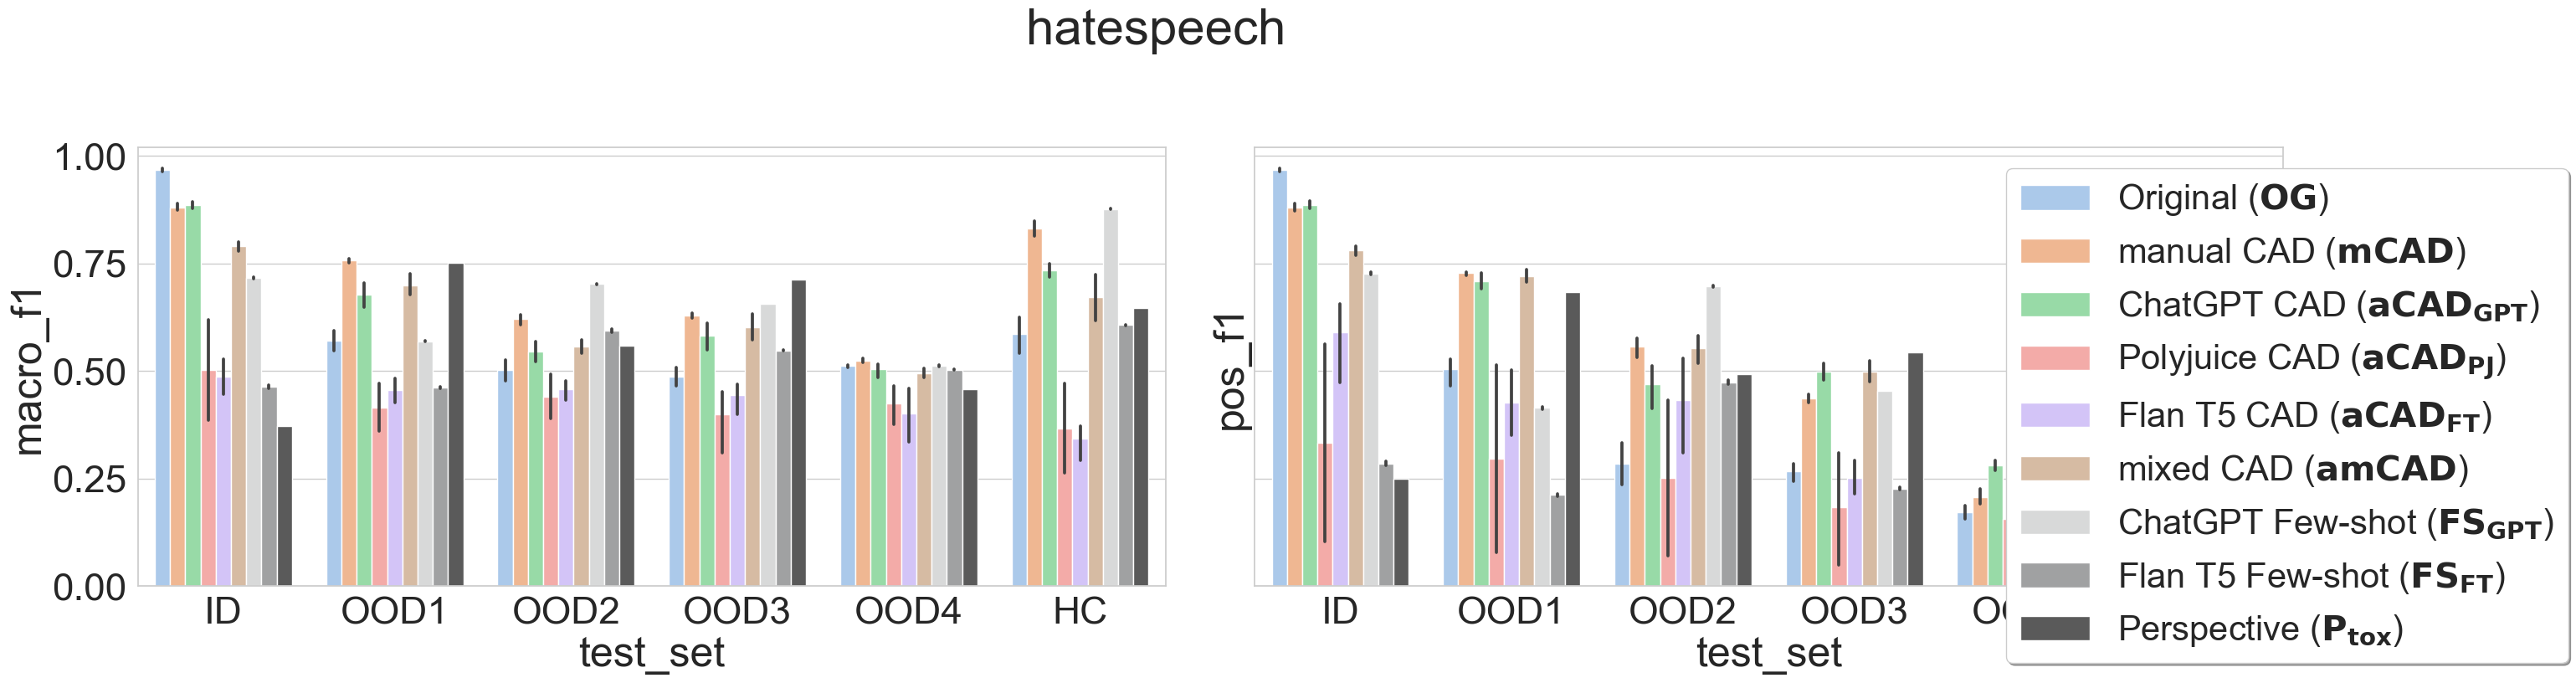

In [52]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (28, 8.5), sharey = True)
sns.barplot(data = all_results_df_hs_, x = 'test_set', y = 'macro_f1', #join = False,
             hue = 'mode', palette=custom_palette, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[0])
sns.barplot(data = all_results_df_hs_, x = 'test_set', y = 'pos_f1', #join = False,
             hue = 'mode', palette=custom_palette, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[1])
ax[1].get_legend().remove()
title = construct #+ '_manual_one_sided_' + all_cad_onesided + flip_pj
plt.suptitle(title, y=1)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.11, 0.8),
          ncol=1, fancybox=True, shadow=True, prop={'size': 30}
          )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax[0].get_legend().remove()
plt.tight_layout()
# plt.savefig('../results/figures/%s_%s.pdf' %(classifier_to_get, title), bbox_inches='tight')
plt.show()

C:\Users\isen1\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\isen1\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


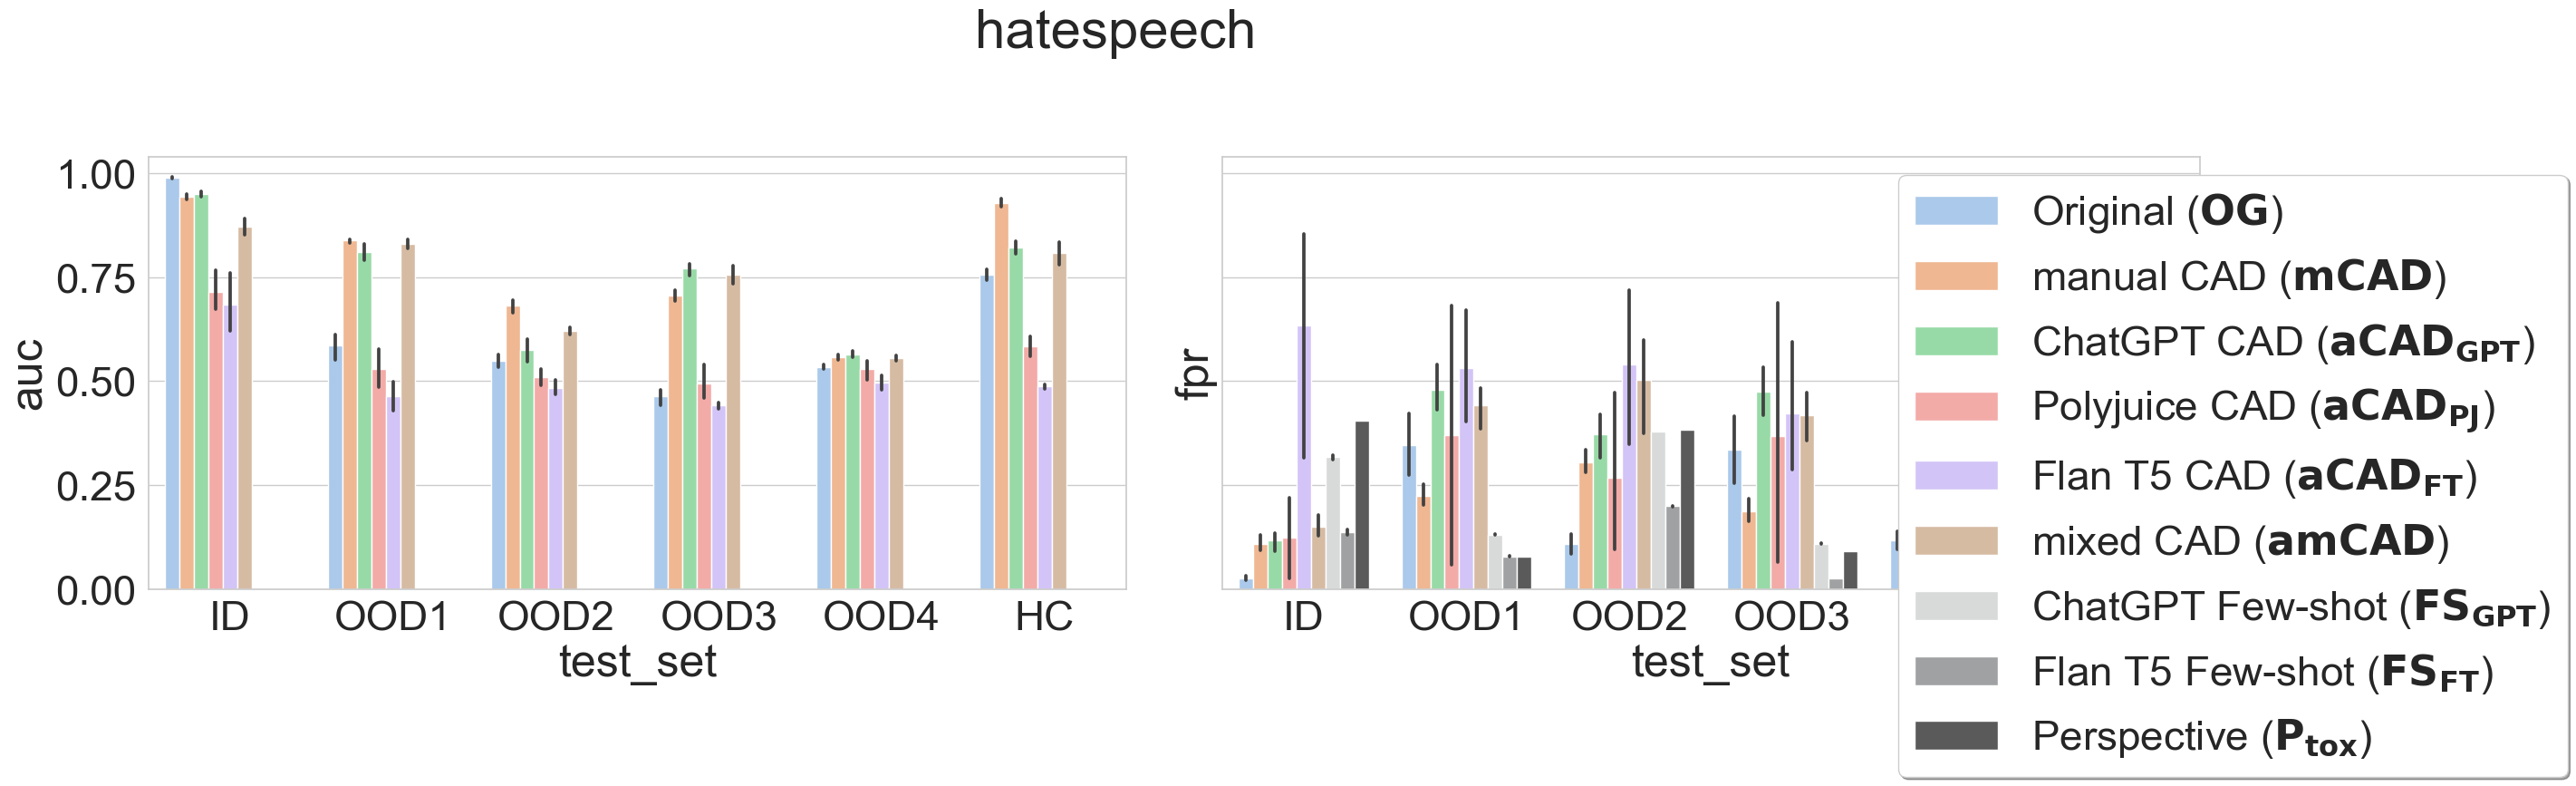

In [53]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 8), sharey = True)
sns.barplot(data = all_results_df_hs_, x = 'test_set', y = 'auc', #join = False,
             hue = 'mode', palette=custom_palette, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[0])
sns.barplot(data = all_results_df_hs_, x = 'test_set', y = 'fpr', #join = False,
             hue = 'mode', palette=custom_palette, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[1])
ax[1].get_legend().remove()
title = 'hatespeech'
plt.suptitle(title, y=1)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 0.8),
          ncol=1, fancybox=True, shadow=True,
          )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax[0].get_legend().remove()
plt.tight_layout()
plt.show()

In [54]:
all_results_df = pd.DataFrame(all_results)
all_results_df_s = all_results_df[all_results_df['construct'] == 'sexism']

In [55]:
all_results_df_s_ = all_results_df_s[['mode', 'test_set', 'classifier', 'macro_f1',
                                                                               'micro_f1']]

In [56]:
data = all_results_df_s_.groupby(['mode', 'test_set', 'classifier']).mean()[[                   'macro_f1',
                                                                               'micro_f1']].unstack().round(3).fillna(0)

std = all_results_df_s_.groupby(['mode', 'test_set', 'classifier']).std()[[                   'macro_f1',
                                                                             'micro_f1']].unstack().round(3).fillna(0)

In [57]:
for col in std.columns:
    std[col] = ' ± ' + std[col].astype(str)

In [58]:
data = data.astype(str) + std.astype(str)
data

macro_f1  \
classifier                                             Linear SVM   
mode                               test_set                         
ChatGPT CAD ($\bf{aCAD_{GPT}}$)    hatecheck        0.516 ± 0.017   
                                   in_domain        0.729 ± 0.005   
                                   out_of_domain    0.602 ± 0.003   
                                   out_of_domain_2  0.516 ± 0.009   
                                   out_of_domain_3  0.554 ± 0.007   
ChatGPT Few-shot ($\bf{FS_{GPT}}$) hatecheck            0.0 ± 0.0   
                                   in_domain            0.0 ± 0.0   
                                   out_of_domain        0.0 ± 0.0   
                                   out_of_domain_2      0.0 ± 0.0   
                                   out_of_domain_3      0.0 ± 0.0   
Flan T5 CAD ($\bf{aCAD_{FT}}$)     hatecheck        0.517 ± 0.032   
                                   in_domain         0.621 ± 0.07   
                                   out_of_domain    0.522 ± 0.036   
                                   out_of_domain_2  0.416 ± 0.061   
                                   out_of_domain_3  0.464 ± 0.037   
Flan T5 Few-shot ($\bf{FS_{FT}}$)  hatecheck            0.0 ± 0.0   
                                   in_domain            0.0 ± 0.0   
                                   out_of_domain        0.0 ± 0.0   
                                   out_of_domain_2      0.0 ± 0.0   
                                   out_of_domain_3      0.0 ± 0.0   
Original ($\bf{OG}$)               hatecheck        0.506 ± 0.018   
                                   in_domain        0.762 ± 0.004   
                                   out_of_domain    0.555 ± 0.004   
                                   out_of_domain_2  0.507 ± 0.006   
                                   out_of_domain_3  0.565 ± 0.004   
Perspective ($\bf{P_{tox}}$)       hatecheck            0.0 ± 0.0   
                                   in_domain            0.0 ± 0.0   
                                   out_of_domain        0.0 ± 0.0   
                                   out_of_domain_2      0.0 ± 0.0   
                                   out_of_domain_3      0.0 ± 0.0   
Polyjuice CAD ($\bf{aCAD_{PJ}}$)   hatecheck        0.492 ± 0.025   
                                   in_domain        0.665 ± 0.006   
                                   out_of_domain    0.572 ± 0.018   
                                   out_of_domain_2  0.469 ± 0.016   
                                   out_of_domain_3  0.513 ± 0.016   
manual CAD ($\bf{mCAD}$)           hatecheck        0.477 ± 0.011   
                                   in_domain        0.739 ± 0.005   
                                   out_of_domain     0.589 ± 0.01   
                                   out_of_domain_2  0.528 ± 0.004   
                                   out_of_domain_3  0.572 ± 0.004   
mixed CAD ($\bf{amCAD}$)           hatecheck        0.487 ± 0.015   
                                   in_domain        0.725 ± 0.006   
                                   out_of_domain    0.588 ± 0.006   
                                   out_of_domain_2  0.524 ± 0.007   
                                   out_of_domain_3   0.57 ± 0.003   

                                                                   \
classifier                                            transformer   
mode                               test_set                         
ChatGPT CAD ($\bf{aCAD_{GPT}}$)    hatecheck        0.565 ± 0.067   
                                   in_domain        0.782 ± 0.009   
                                   out_of_domain    0.614 ± 0.023   
                                   out_of_domain_2  0.588 ± 0.024   
                                   out_of_domain_3  0.611 ± 0.013   
ChatGPT Few-shot ($\bf{FS_{GPT}}$) hatecheck        0.805 ± 0.004   
                                   in_domain        0.743 ± 0.001   
                                   out_of_domain    0.

In [59]:
all_results_df_s_ = all_results_df_s_[all_results_df_s_['classifier'] == classifier_to_get]

In [60]:
label_map = {'in_domain' : 'ID', 'out_of_domain' : 'OOD1',
             'out_of_domain_2' : 'OOD2', 'out_of_domain_3' : 'OOD3',
             'hatecheck' : 'HC'}

all_results_df_s_['test_set'] = [label_map[i] for i in all_results_df_s_['test_set']]

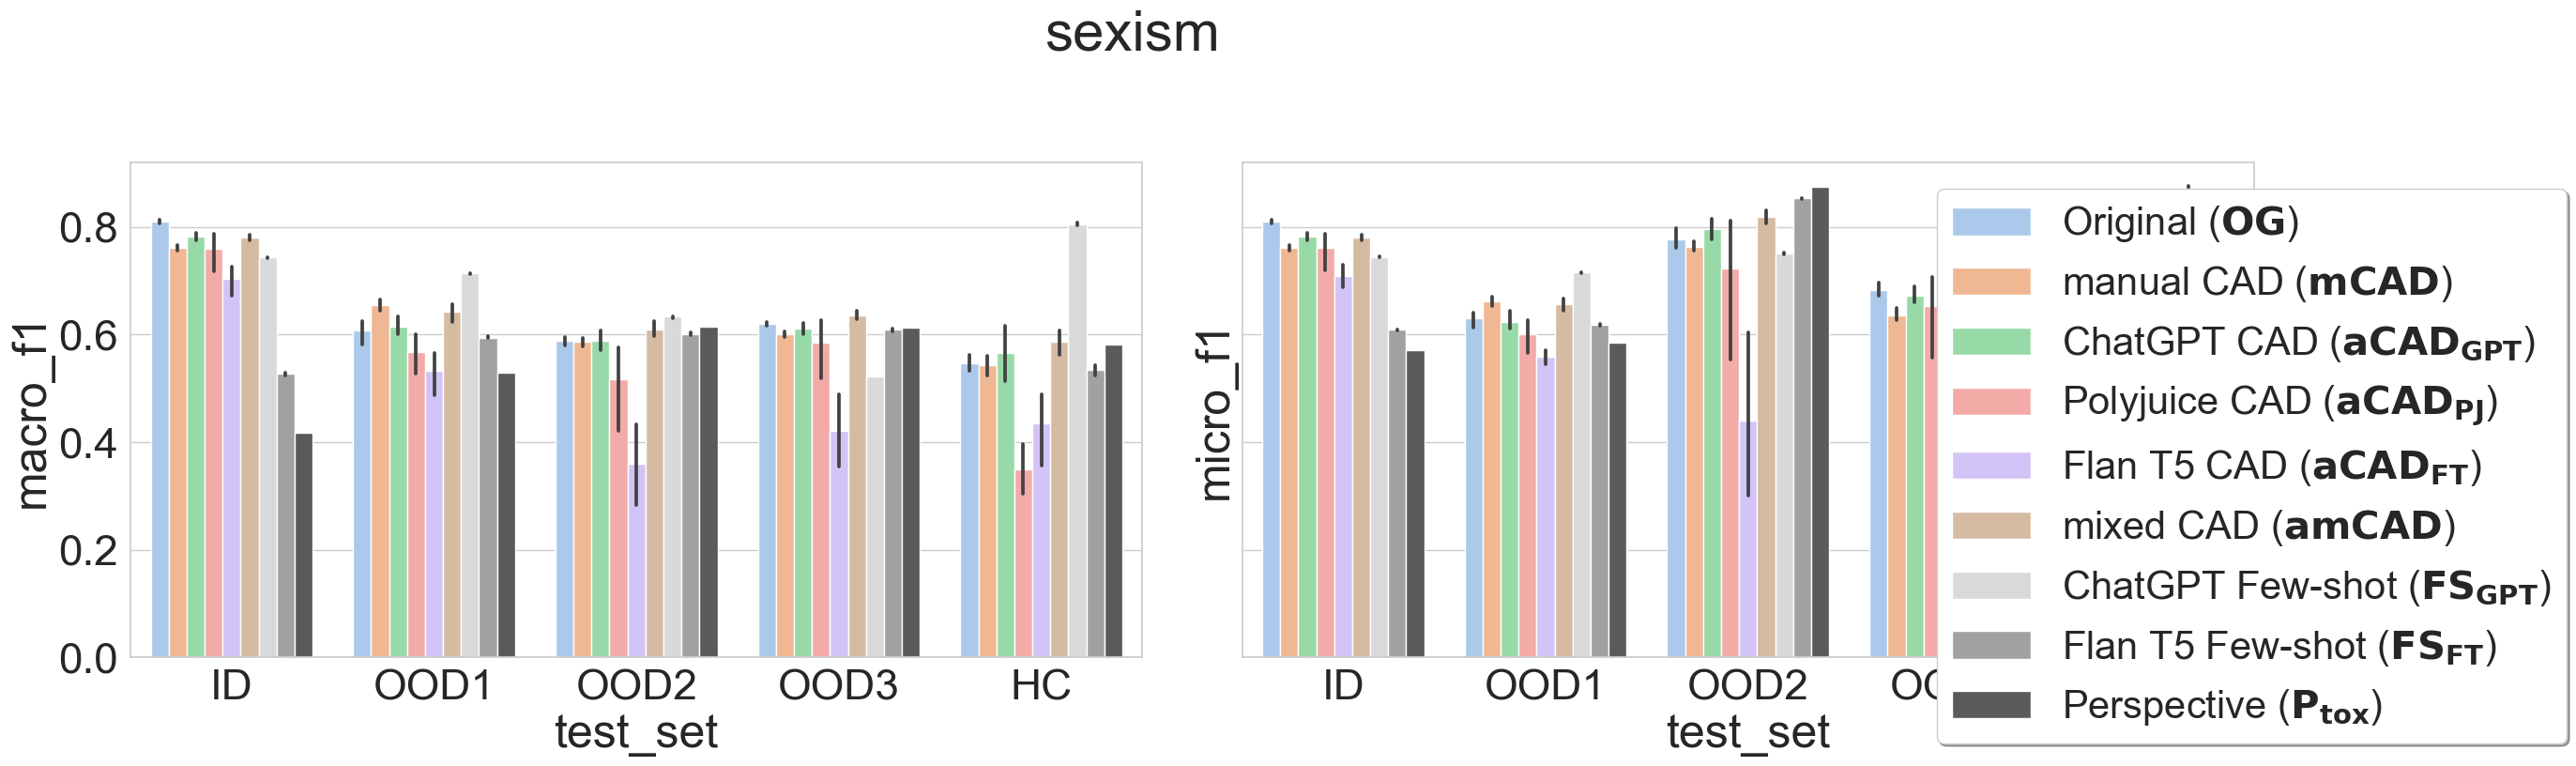

In [61]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 8.5), sharey = True)
sns.barplot(data = all_results_df_s_, x = 'test_set', y = 'macro_f1', #join = False,
             hue = 'mode', palette=custom_palette, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[0])
sns.barplot(data = all_results_df_s_, x = 'test_set', y = 'micro_f1', #join = False,
             hue = 'mode', palette=custom_palette, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[1])
ax[1].get_legend().remove()
title = 'sexism' #+ '_manual_one_sided_' + all_cad_onesided + flip_pj
plt.suptitle(title, y=1)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 0.8),
          ncol=1, fancybox=True, shadow=True,prop={'size': 30}
          )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax[0].get_legend().remove()
plt.tight_layout()
# plt.savefig('../results/figures/%s_%s.pdf' %(classifier_to_get, title), bbox_inches='tight')
plt.show()

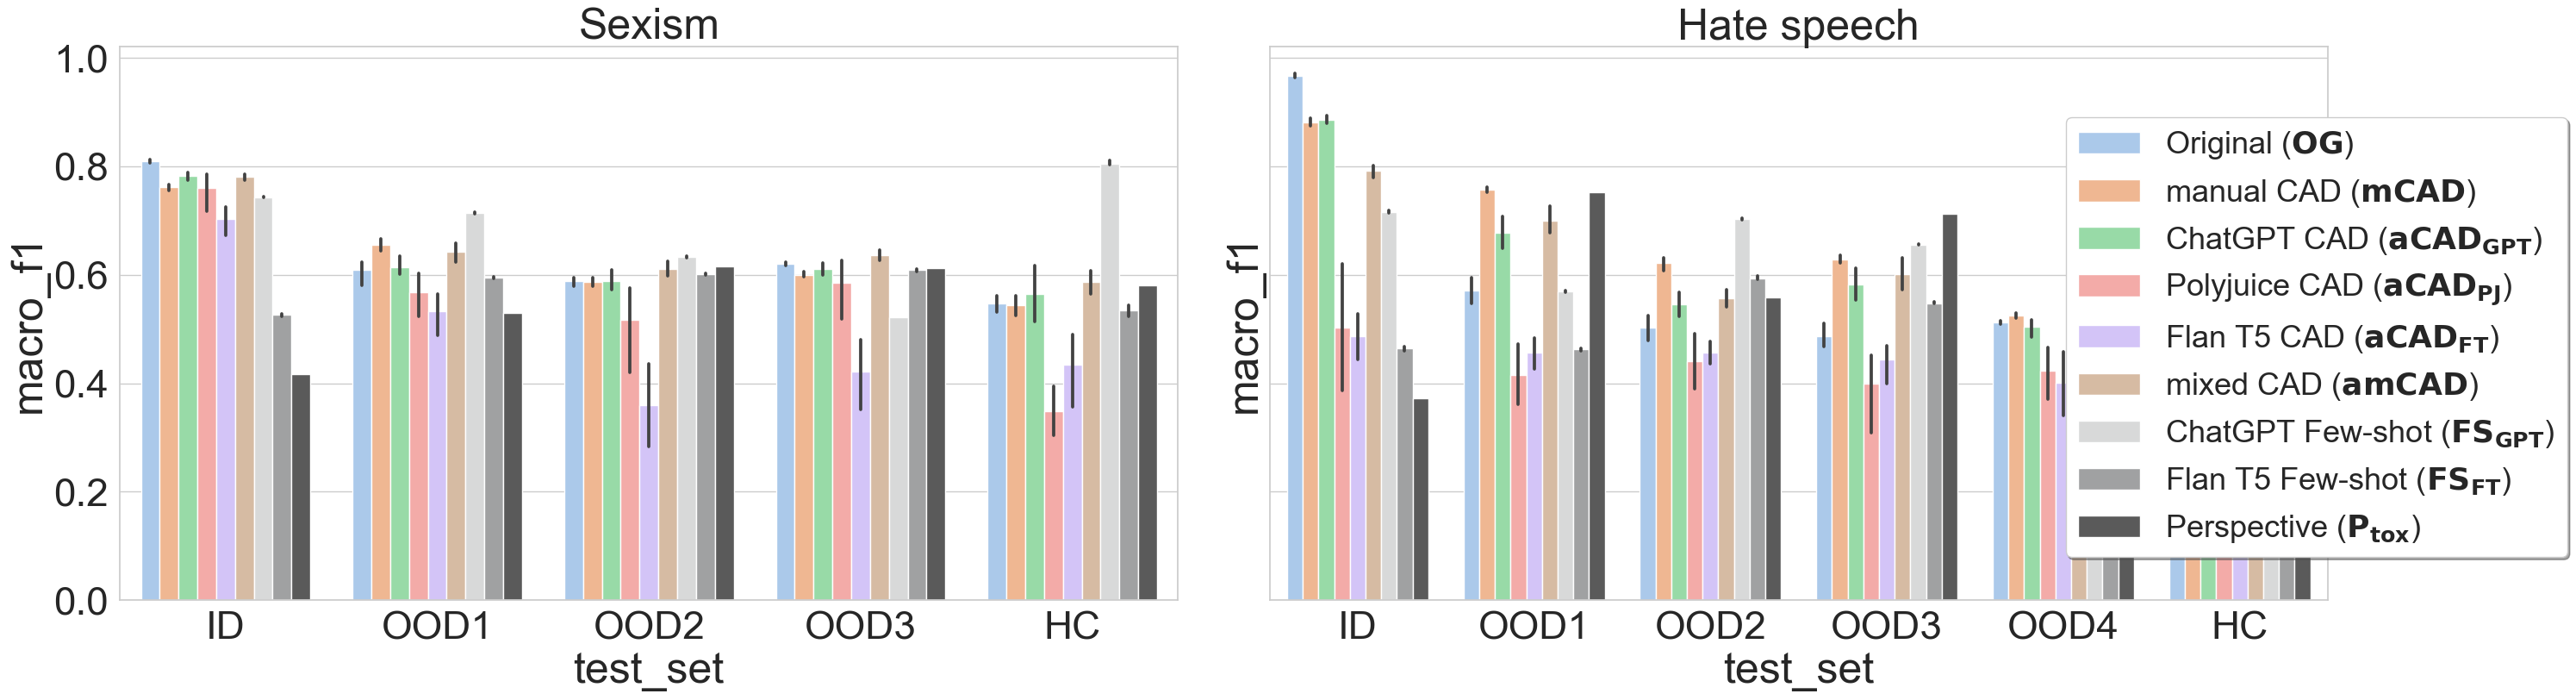

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (28, 9), sharey = True)
sns.barplot(data = all_results_df_s_, x = 'test_set', y = 'macro_f1', #join = False,
             hue = 'mode', palette=custom_palette, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[0])
sns.barplot(data = all_results_df_hs_, x = 'test_set', y = 'macro_f1', #join = False,
             hue = 'mode', palette=custom_palette, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[1])


ax[0].set_title('Sexism')
ax[1].set_title('Hate speech')
ax[1].get_legend().remove()

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.08, 0.8),
          ncol=1, fancybox=True, shadow=True, prop={'size': 26}, borderaxespad=0.
          )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax[0].get_legend().remove()
plt.tight_layout()
# plt.savefig('../results/figures/%s_rq1_macrof1.pdf' %(classifier_to_get), bbox_inches='tight')
plt.show()

### overall results on all OOD datasets

In [63]:
all_results_df = pd.DataFrame(all_results)

In [64]:
all_results_overall_macro_df = all_results_df[all_results_df['test_set'] != 'in_domain']
all_results_overall_macro_df_ = all_results_overall_macro_df[['construct', 'mode', 'classifier', 'macro_f1',
                                                                               'micro_f1']]
data = all_results_overall_macro_df_.groupby(['construct', 'mode', 'classifier']).mean()['macro_f1'].unstack().round(3).fillna(0)

std = all_results_overall_macro_df_.groupby(['construct', 'mode', 'classifier']).std()['macro_f1'].unstack().round(3).fillna(0)
for col in std.columns:
    std[col] = ' ± ' + std[col].astype(str)
    
data_macro = data.astype(str) + std.astype(str)
data_macro

classifier                                        Linear SVM    transformer
construct  mode                                                            
hatespeech ChatGPT CAD ($\bf{aCAD_{GPT}}$)     0.486 ± 0.072  0.609 ± 0.091
           ChatGPT Few-shot ($\bf{FS_{GPT}}$)      0.0 ± 0.0   0.663 ± 0.13
           Flan T5 CAD ($\bf{aCAD_{FT}}$)      0.419 ± 0.029   0.42 ± 0.066
           Flan T5 Few-shot ($\bf{FS_{FT}}$)       0.0 ± 0.0  0.543 ± 0.056
           Original ($\bf{OG}$)                0.448 ± 0.078   0.532 ± 0.05
           Perspective ($\bf{P_{tox}}$)            0.0 ± 0.0  0.625 ± 0.119
           Polyjuice CAD ($\bf{aCAD_{PJ}}$)     0.45 ± 0.037  0.409 ± 0.087
           manual CAD ($\bf{mCAD}$)            0.533 ± 0.072  0.673 ± 0.111
           mixed CAD ($\bf{amCAD}$)            0.521 ± 0.061  0.605 ± 0.084
sexism     ChatGPT CAD ($\bf{aCAD_{GPT}}$)     0.547 ± 0.037   0.595 ± 0.04
           ChatGPT Few-shot ($\bf{FS_{GPT}}$)      0.0 ± 0.0  0.669 ± 0.109
           Flan T5 CAD ($\bf{aCAD_{FT}}$)       0.48 ± 0.059  0.437 ± 0.099
           Flan T5 Few-shot ($\bf{FS_{FT}}$)       0.0 ± 0.0  0.585 ± 0.031
           Original ($\bf{OG}$)                0.533 ± 0.029  0.591 ± 0.033
           Perspective ($\bf{P_{tox}}$)            0.0 ± 0.0   0.584 ± 0.04
           Polyjuice CAD ($\bf{aCAD_{PJ}}$)    0.511 ± 0.043  0.505 ± 0.119
           manual CAD ($\bf{mCAD}$)            0.541 ± 0.045  0.596 ± 0.043
           mixed CAD ($\bf{amCAD}$)            0.542 ± 0.042   0.619 ± 0.03

In [65]:
all_results_overall_macro_df_['test_set'] = ['all OOD\n+ HC'] * len(all_results_overall_macro_df_)
all_results_overall_macro_df_ = all_results_overall_macro_df_[all_results_overall_macro_df_['classifier'] == classifier_to_get]
all_results_df_s = pd.concat([all_results_df_s_,
                              all_results_overall_macro_df_[all_results_overall_macro_df_['construct'] == 'sexism']])
all_results_df_hs = pd.concat([all_results_df_hs_,
                              all_results_overall_macro_df_[all_results_overall_macro_df_['construct'] == 'hatespeech']])

C:\Users\isen1\AppData\Local\Temp\ipykernel_29532\3826481643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results_overall_macro_df_['test_set'] = ['all OOD\n+ HC'] * len(all_results_overall_macro_df_)


In [66]:
all_results_df_s['test_set'].unique()

array(['ID', 'OOD1', 'OOD2', 'OOD3', 'HC', 'all OOD\n+ HC'], dtype=object)

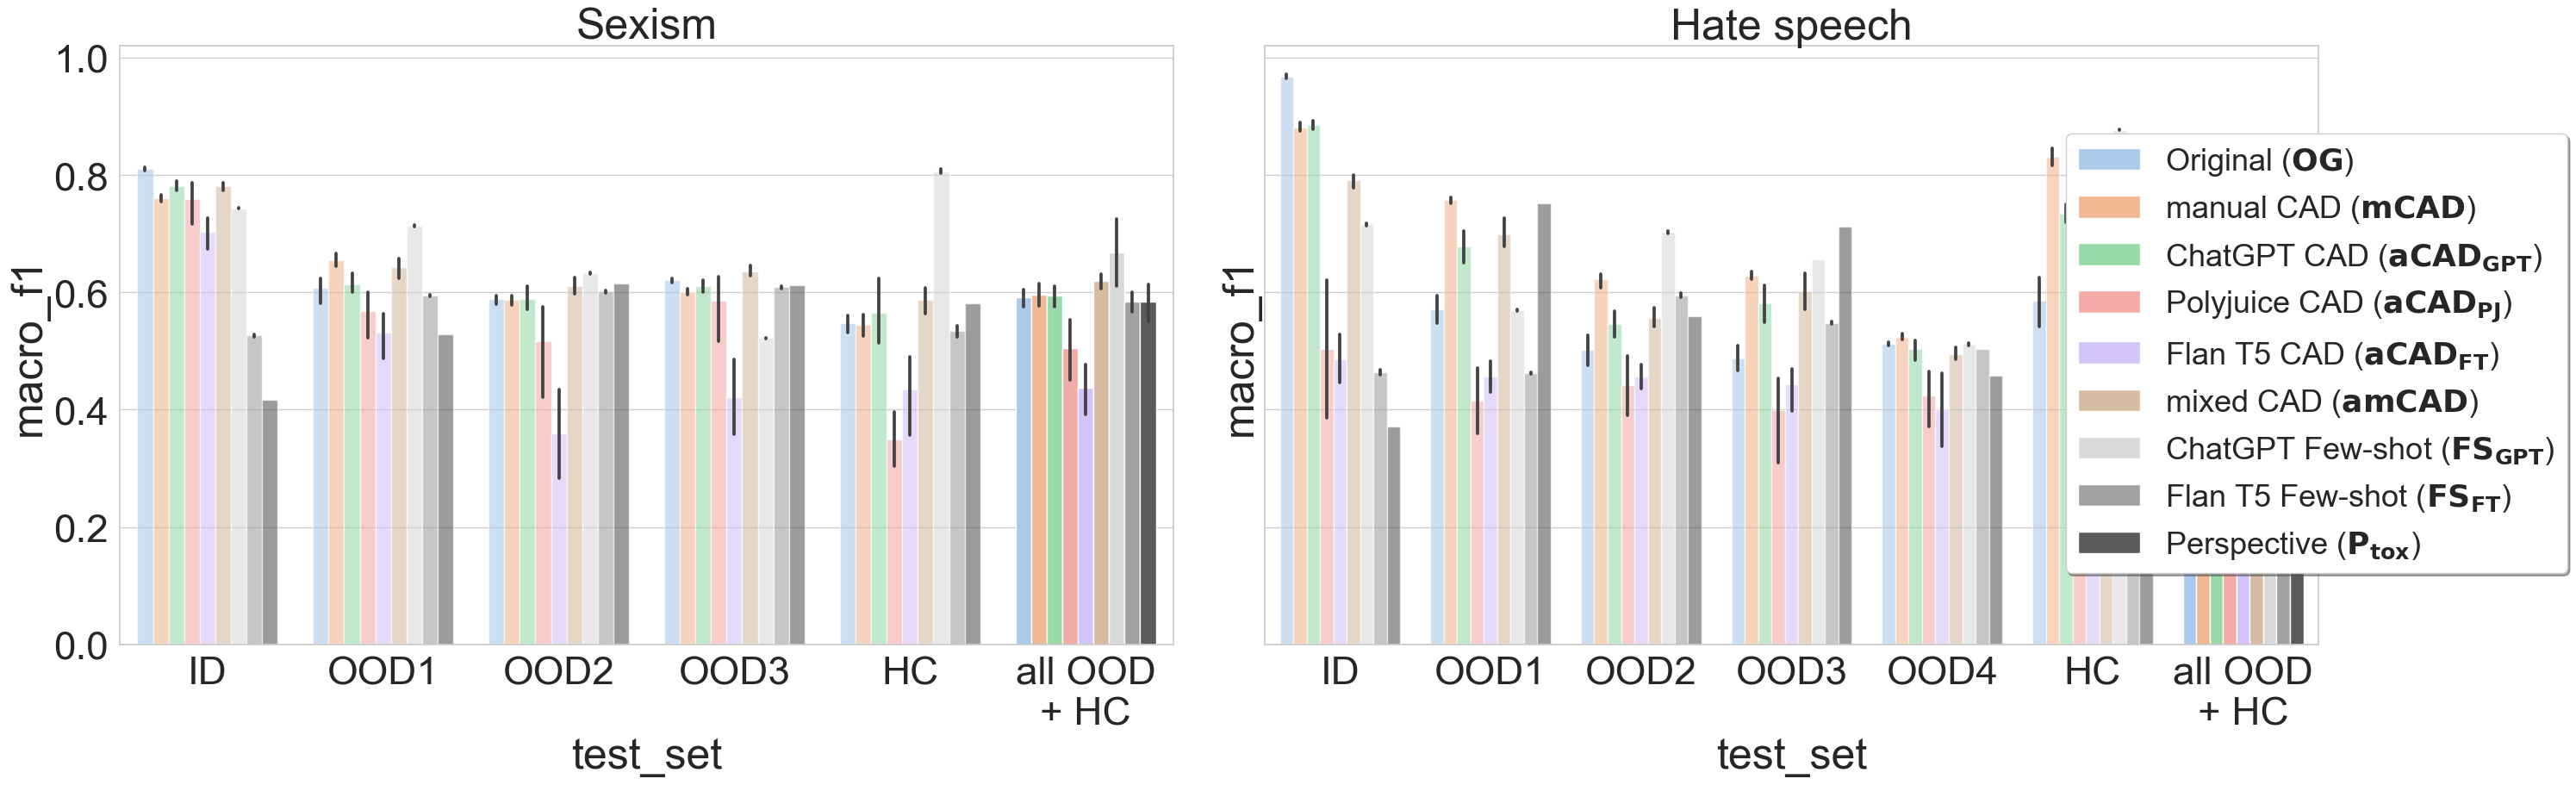

In [67]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (28, 10), sharey = True)
sns.barplot(data = all_results_df_s, x = 'test_set', y = 'macro_f1', #join = False,
             hue = 'mode', palette=custom_palette, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[0])
sns.barplot(data = all_results_df_hs, x = 'test_set', y = 'macro_f1', #join = False,
             hue = 'mode', palette=custom_palette, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[1])


ax[0].set_title('Sexism')
ax[1].set_title('Hate speech')
ax[1].get_legend().remove()

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.08, 0.8),
          ncol=1, fancybox=True, shadow=True, prop={'size': 26}, borderaxespad=0.
          )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax[0].get_legend().remove()

for i, bar in enumerate(ax[0].patches):
    if i % 6 != 5:
        bar.set_alpha(0.6)

for i, bar in enumerate(ax[1].patches):
    if i % 7 != 6:
        bar.set_alpha(0.6)
        
plt.tight_layout()
# plt.savefig('../results/figures/%s_rq1_macrof1.pdf' %(classifier_to_get), bbox_inches='tight')
plt.show()

In [68]:
markers = ['o', 's', '^', '^',
          '^',  'D',
           (5, 2), (5, 2), (5, 2),
          'p', 'p', 'p'] # '$bl$'
custom_palette_ = custom_palette[:1] + ['#FF5733'] + ['#32612D', '#3cb043', '#AFE1AF'] + \
['#E4D00A'] + ['#5A5A5A',  '#A0A1A2', '#D8D9D9']

# custom_palette_ = custom_palette[:1] + ['#FF5733', '#32612D', '#3cb043', '#AFE1AF'] + \
# ['#5A5A5A',  '#A0A1A2', '#D8D9D9']

In [69]:
all_results_df_s['macro f1'] = all_results_df_s['macro_f1']
all_results_df_hs['macro f1'] = all_results_df_hs['macro_f1']

In [70]:
all_results_df_hs_

,test_set,run,classifier,mode,construct,predictions,pos_precision,neg_precision,pos_recall,neg_recall,pos_f1,neg_f1,macro_f1,micro_f1,weighted_f1,auc,fpr,fpr-fnr,fnr
330,ID,0,transformer,Original ($\bf{OG}$),hatespeech,"[hate, hate, not hate, not hate, not hate, not...",0.973970,0.953586,0.953291,0.953291,0.963519,0.963753,0.963636,0.963636,0.963635,0.990718,0.025862,-0.020847,NaN
331,OOD1,0,transformer,Original ($\bf{OG}$),hatespeech,"[not hate, not hate, not hate, not hate, not h...",0.580656,0.644845,0.461338,0.461338,0.514166,0.691703,0.602934,0.622779,0.614887,0.615354,0.254097,-0.284565,NaN
332,OOD2,0,transformer,Original ($\bf{OG}$),hatespeech,"[not hate, not hate, hate, not hate, not hate,...",0.591362,0.599111,0.141270,0.141270,0.228059,0.728542,0.478301,0.598333,0.518339,0.551188,0.070690,-0.788041,NaN
333,OOD3,0,transformer,Original ($\bf{OG}$),hatespeech,"[hate, hate, hate, not hate, hate, not hate, n...",0.253123,0.770699,0.277588,0.277588,0.264791,0.759055,0.511923,0.637056,0.642680,0.476223,0.252241,-0.470171,NaN
334,OOD4,0,transformer,Original ($\bf{OG}$),hatespeech,"[not hate, not hate, not hate, not hate, not h...",0.228093,0.825012,0.139700,0.139700,0.173275,0.858862,0.516068,0.758887,0.734859,0.535364,0.104392,-0.755908,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,OOD1,2,transformer,Perspective ($\bf{P_{tox}}$),hatespeech,"[hate, not hate, not hate, hate, hate, hate, n...",0.847564,0.738694,0.572602,0.572602,0.683465,0.820016,0.751740,0.770518,0.760934,NaN,0.078541,-0.348858,0.427398
733,OOD2,2,transformer,Perspective ($\bf{P_{tox}}$),hatespeech,"[not hate, not hate, not hate, not hate, not h...",0.486507,0.630652,0.500794,0.500794,0.493547,0.623875,0.558711,0.568333,0.569137,NaN,0.382759,-0.116448,0.499206
734,OOD3,2,transformer,Perspective ($\bf{P_{tox}}$),hatespeech,"[hate, not hate, not hate, not hate, not hate,...",0.622217,0.851228,0.483828,0.483828,0.544365,0.879415,0.711890,0.809300,0.800527,NaN,0.090467,-0.425705,0.516172
735,OOD4,2,transformer,Perspective ($\bf{P_{tox}}$),hatespeech,"[not hate, not hate, not hate, not hate, not h...",0.109229,0.804602,0.101815,0.101815,0.105392,0.810586,0.457989,0.687366,0.683037,NaN,0.183339,-0.714846,0.898185


C:\Users\isen1\anaconda3\Lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.35294117647058826, 0.35294117647058826, 0.35294117647058826)) for an unfilled marker ((5, 2)).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
C:\Users\isen1\anaconda3\Lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6274509803921569, 0.6313725490196078, 0.6352941176470588)) for an unfilled marker ((5, 2)).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
C:\Users\isen1\anaconda3\Lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.8470588235294118, 0.8509803921568627, 0.8509803921568627)) for an unfilled marker ((5, 2)).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  Th

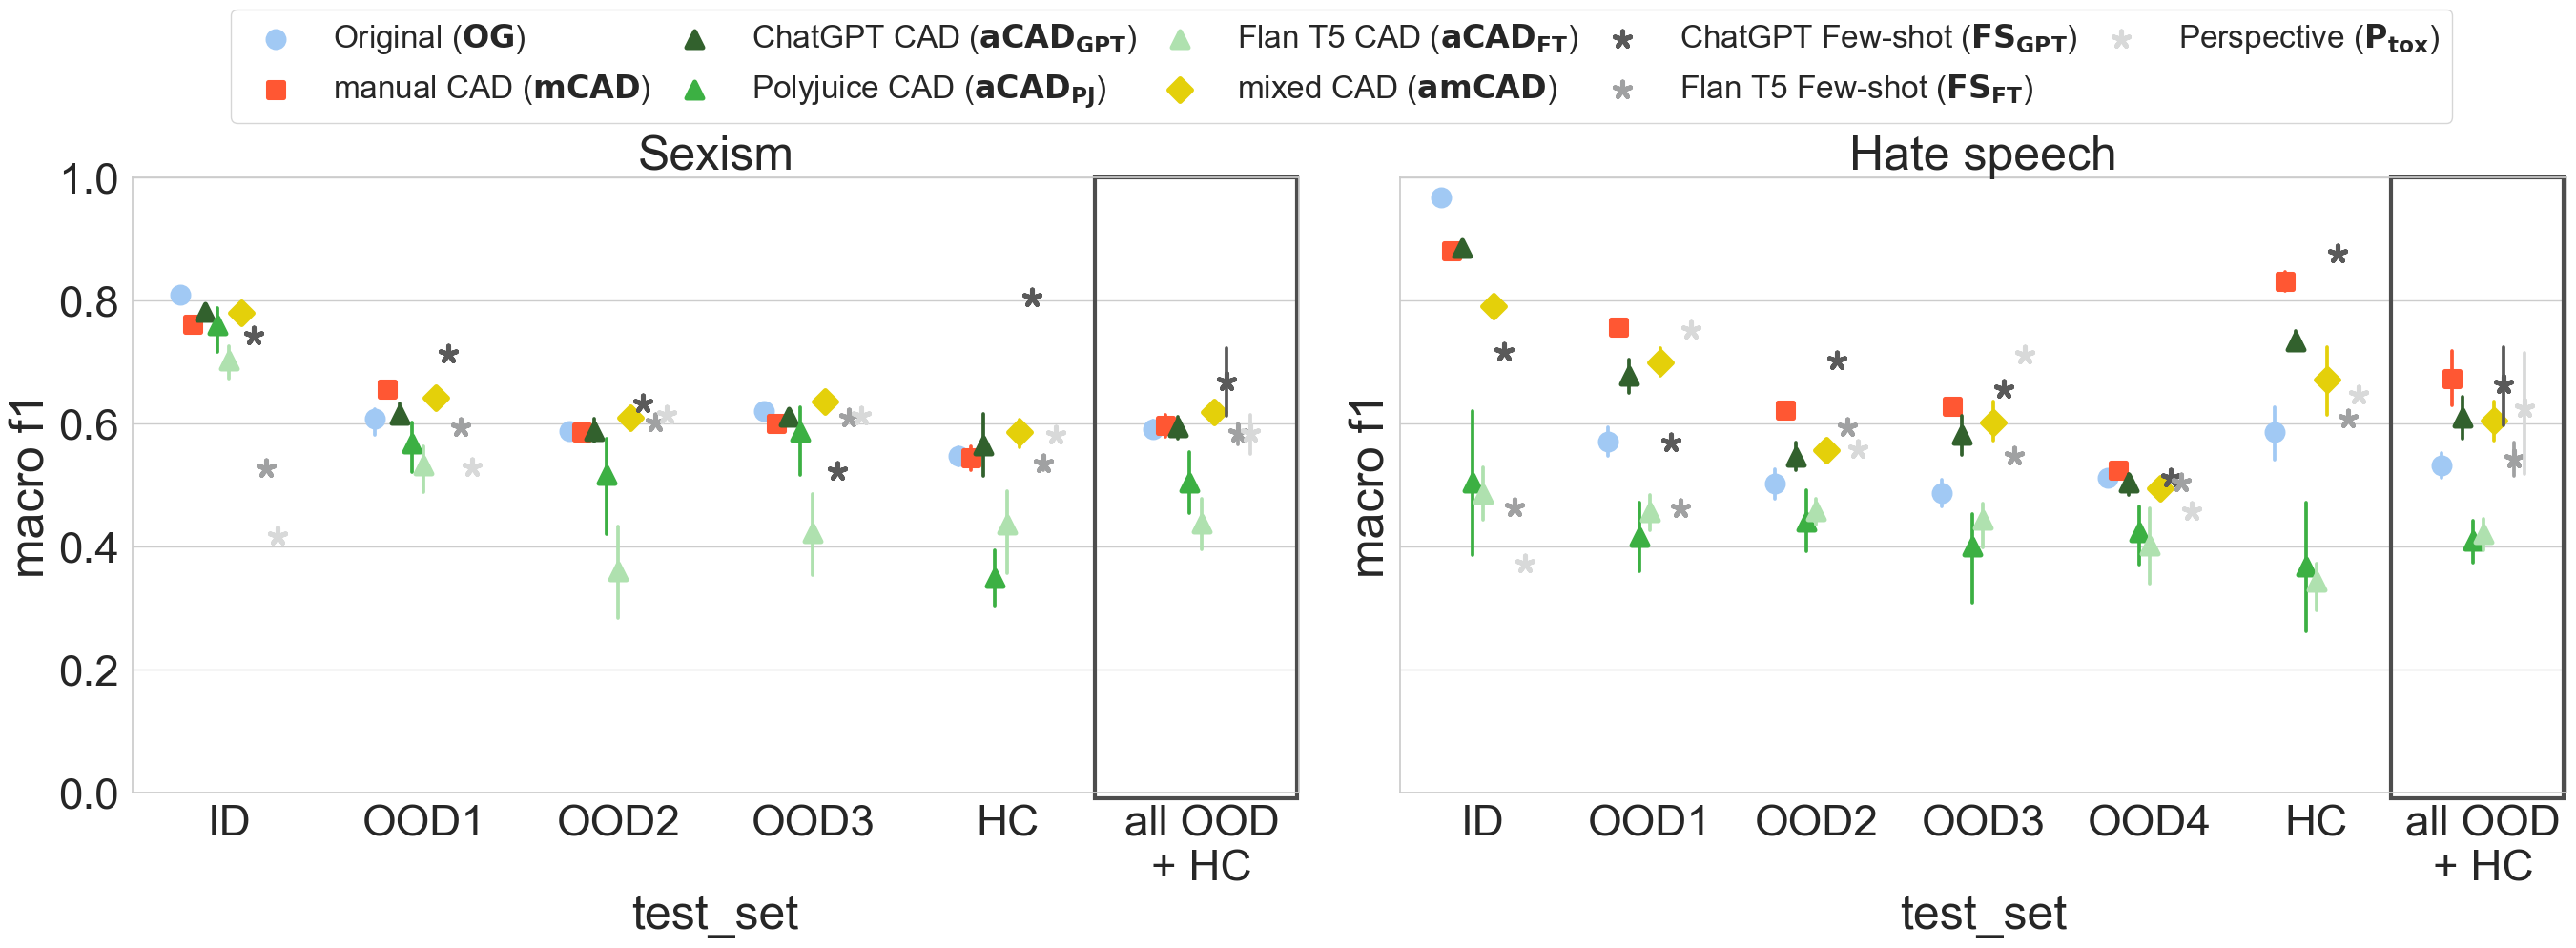

In [71]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (28, 9.5), sharey = True)
sns.pointplot(data = all_results_df_s, x = 'test_set', y = 'macro f1', #join = False,
             hue = 'mode', palette=custom_palette_, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[0], join = False, dodge = 0.5, scale = 1.8, markers = markers)
sns.pointplot(data = all_results_df_hs, x = 'test_set', y = 'macro f1', #join = False,
             hue = 'mode', palette=custom_palette_, # markers = True,#, hue_norm=mpl.colors.LogNorm()
            ax = ax[1], join = False, dodge = 0.5, scale = 1.8, markers = markers)


ax[0].set_title('Sexism')
ax[1].set_title('Hate speech')
# ax[1].get_legend().remove()

handles, labels = ax[0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(.94, 1.1),
          ncol=5, prop={'size': 24}, fancybox = True, columnspacing = 0.35, # title = 'models'
                 # borderaxespad=-0.10
          )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# lgd.get_frame().set_edgecolor('black')
# lgd.get_frame().set_width(1)
ax[0].get_legend().remove()
ax[1].get_legend().remove()
        
import matplotlib.patches as patches

ax[0].add_patch(patches.Rectangle((4.45, -0.01),
                                                        1.04,1.01,
                                                        linewidth=3,
                                                        edgecolor='.3',
                                                        facecolor='none',
                                                        clip_on=False))

ax[0].set_ylim(0, 0.9)
ax[1].set_ylim(0, 1)

ax[1].add_patch(patches.Rectangle((5.45, -0.01),
                                                        1.03,1.01-ax[1].get_ylim()[0],
                                                        linewidth=3,
                                                        edgecolor='.3',
                                                        facecolor='none',
                                                        clip_on=False))

# ax[0].text(6.7+1.05/2, .92, 'avg', ha='center')  
    
plt.tight_layout()
fig.savefig('../results/figures/%s_rq1_macrof1_point.pdf' %(classifier_to_get), bbox_extra_artists=(lgd,),
             bbox_inches='tight', dpi = 300)
plt.show()

## How much of chatgpt and flant5 output is malformed, aka, 'unavail'

In [72]:
rows = []

for construct in constructs:
    data = test_set_data[construct]
    for mode in fs_modes:
        for test_set in data['dataset'].unique():
            test_data = data[data['dataset'] == test_set]
            for run in range(0, 3):
                unavail = test_data[test_data['%s_label_%d' %(mode, run)] == 'unavail']
                rows.append([construct, mode, test_set, run, len(unavail) / len(test_data)])

In [73]:
data = pd.DataFrame(rows)
data.columns = ['construct', 'method', 'test_set', 'run', 'unavail']
data.groupby(['construct', 'test_set', 'method']).mean()['unavail'].unstack()

method                      chatgpt  flant5
construct  test_set                        
hatespeech hatecheck            0.0     0.0
           in_domain            0.0     0.0
           out_of_domain        0.0     0.0
           out_of_domain_2      0.0     0.0
           out_of_domain_3      0.0     0.0
           out_of_domain_4      0.0     0.0
sexism     hatecheck            0.0     0.0
           in_domain            0.0     0.0
           out_of_domain        0.0     0.0
           out_of_domain_2      0.0     0.0
           out_of_domain_3      0.0     0.0

In [74]:
print(data.groupby(['construct', 'test_set', 'method']).mean()['unavail'].unstack().to_latex())

\begin{tabular}{llrr}
\toprule
 & method & chatgpt & flant5 \\
construct & test_set &  &  \\
\midrule
\multirow[t]{6}{*}{hatespeech} & hatecheck & 0.000000 & 0.000000 \\
 & in_domain & 0.000000 & 0.000000 \\
 & out_of_domain & 0.000000 & 0.000000 \\
 & out_of_domain_2 & 0.000000 & 0.000000 \\
 & out_of_domain_3 & 0.000000 & 0.000000 \\
 & out_of_domain_4 & 0.000000 & 0.000000 \\
\cline{1-4}
\multirow[t]{5}{*}{sexism} & hatecheck & 0.000000 & 0.000000 \\
 & in_domain & 0.000000 & 0.000000 \\
 & out_of_domain & 0.000000 & 0.000000 \\
 & out_of_domain_2 & 0.000000 & 0.000000 \\
 & out_of_domain_3 & 0.000000 & 0.000000 \\
\cline{1-4}
\bottomrule
\end{tabular}

